# EDA
Here, you will find a very basic EDA for **Prepared_Dataset.csv**. We could not do more deep and interesting EDA because the obtained metadata is messy due to the difficulties of scraping [Abjjad](http://abjjad.com).

In [1]:
# Import packages
import math
import pandas as pd # For DataFrame 
import numpy as np # Array and numerical processing

pd.set_option('display.max_columns', 999)
low_memory=False

In [2]:
#from bidi.algorithm import get_display # Arabic labels
import matplotlib.pyplot as plt # Low level plotting
import seaborn as sns # High level Plotting
#import arabic_reshaper

# Setting plots
#current_palette = sns.color_palette()
current_palette = sns.diverging_palette(220, 20, n=25)

In [3]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
books = pd.read_csv('Data/Books_Data/Prepared_Dataset.csv')

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16558 entries, 0 to 16557
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16558 non-null  int64  
 1   ISBN              8562 non-null   object 
 2   Title             16558 non-null  object 
 3   Author            16550 non-null  object 
 4   Authors_Number    16551 non-null  float64
 5   Description       16558 non-null  object 
 6   Genres            15178 non-null  object 
 7   Average_Ratings   16558 non-null  object 
 8   Reviews_Number    7627 non-null   float64
 9   Quotes_Number     4555 non-null   float64
 10  Community_Size    15777 non-null  float64
 11  Pages_Number      16558 non-null  int64  
 12  Editions          16558 non-null  int64  
 13  Publication_Year  14154 non-null  float64
 14  Publisher         1461 non-null   object 
 15  URL               16558 non-null  object 
 16  Cover_URL         16554 non-null  object

In [6]:
books = books.drop(columns=['Unnamed: 0'])

In [7]:
# Overview on descriptive statistics
books.describe()

,Authors_Number,Reviews_Number,Quotes_Number,Community_Size,Pages_Number,Editions,Publication_Year
count,16551.000000,7627.000000,4555.000000,15777.000000,16558.000000,16558.000000,14154.000000
mean,1.266933,4.949390,7.733480,90.951829,267.110400,1.206909,2006.655645
std,0.614069,15.614666,22.542618,590.041970,960.707204,0.995342,18.504608
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,360.000000
25%,1.000000,1.000000,1.000000,7.000000,68.000000,1.000000,2004.000000
50%,1.000000,1.000000,2.000000,14.000000,208.000000,1.000000,2009.000000
75%,1.000000,3.000000,6.000000,40.000000,344.000000,1.000000,2013.000000
max,11.000000,387.000000,482.000000,22210.000000,100000.000000,46.000000,2023.000000


In [8]:
books.head()

,ISBN,Title,Author,Authors_Number,Description,Genres,Average_Ratings,Reviews_Number,Quotes_Number,Community_Size,Pages_Number,Editions,Publication_Year,Publisher,URL,Cover_URL
0,9774416333,استمتع بحياتك,محمد عبد الرحمن العريفي,1.0,لما كنت فى السادسة عشرة من عمري وقع فى يدي كتا...,علوم إسلامية رقائق,4.0,97.0,39.0,7945.0,344,4,2009.0,NaN,https://www.abjjad.com/book/15445916/%D8%A7%D8...,https://abjjadst.blob.core.windows.net/pub/2f2...
1,9789777195522,عبقرية عمر,عباس محمود العقاد,1.0,يزخر التاريخ الإسلامي برجال عِظام سطروا حوادثه...,علوم إسلامية سيرة الصحابة,4.1,64.0,114.0,7337.0,497,3,2014.0,NaN,https://www.abjjad.com/book/15445340/%D8%B9%D8...,https://abjjadst.blob.core.windows.net/pub/e5f...
2,9789777195331,عبقرية محمد,عباس محمود العقاد,1.0,احتفى التاريخ العربي بالسيرة المُحمدية؛ فأفرد ...,علوم إسلامية السيرة النبوية,4.3,45.0,62.0,4151.0,238,2,2013.0,NaN,https://www.abjjad.com/book/15445339/%D8%B9%D8...,https://abjjadst.blob.core.windows.net/pub/7df...
3,NaN,لأنك الله : رحلة إلى السماء السابعة,علي بن جابر الفيفي,2.0,كتاب يتحدث عن بعض أسماء الله الحسنى وكيف نعيشه...,علوم إسلامية رقائق,4.7,83.0,99.0,3133.0,192,1,2016.0,NaN,https://www.abjjad.com/book/2653683959/%D9%84%...,https://abjjadst.blob.core.windows.net/pub/c35...
4,9789777194693,عبقرية الإمام علي,عباس محمود العقاد,1.0,بَرَع «عباس محمود العقاد» في تناول شخصية الإما...,علوم إسلامية سيرة الصحابة,4.3,30.0,25.0,2592.0,87,4,2013.0,NaN,https://www.abjjad.com/book/15445343/%D8%B9%D8...,https://abjjadst.blob.core.windows.net/pub/0b2...


In [9]:
# Number of authors
len(books['Author'].unique())

8663

In [10]:
# To fix the Arabic issues with po
# https://aziz-droos.com/?p=12316
def f(x):
    out=get_display(arabic_reshaper.reshape(x))
    return(out)

## The most 50 authors according to number of their books.

In [11]:
# Number of books per author
books['Author'].value_counts()

 ناديا دياب                  142
 كامل كيلاني                 119
 عباس محمود العقاد            81
 مصطفى محمود                  75
 أجاثا كريستي                 70
                            ... 
 جوزيف غولدشتاين               1
 طريف الخالدي                  1
 زكي خليل المساعد              1
 مجموعة مؤلفين إسرائيليين      1
 كامل مروة                     1
Name: Author, Length: 8662, dtype: int64

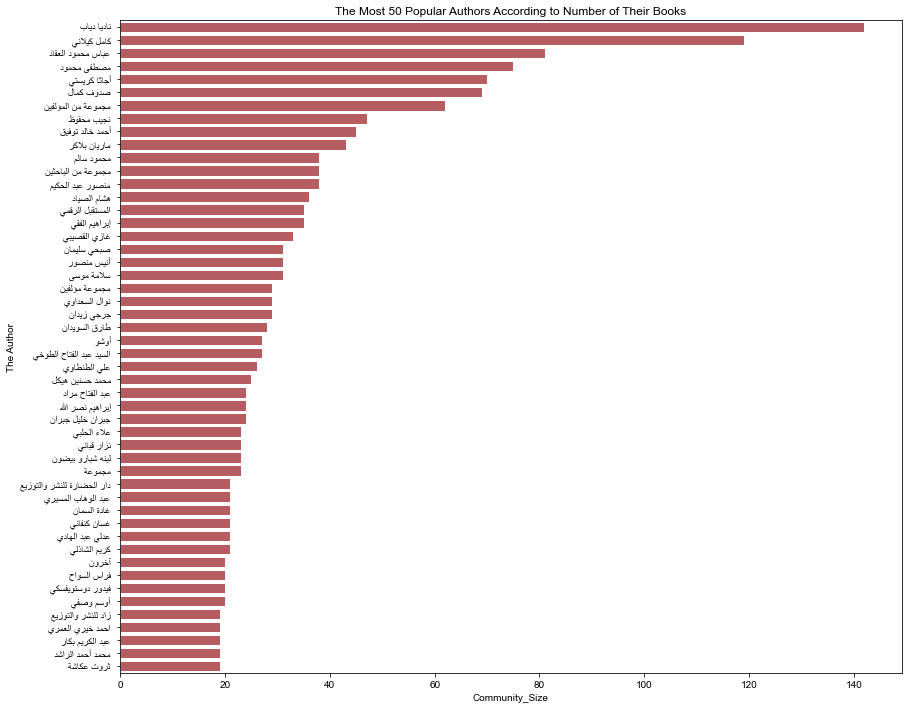

In [12]:
authors = books['Author'].value_counts().nlargest(50)
#pd.Series(popular_authors.values).apply(f)
#popular_authors.values = popular_authors.values.apply(f)
plt.figure(figsize=(14,12))
plt.title("The Most 50 Popular Authors According to Number of Their Books")
sns.set(style="whitegrid") #dark, white, ticks
sns.barplot(authors.values, pd.Series(authors.index).apply(f), color = "r")
plt.ylabel("The Author")
plt.xlabel("Community_Size")
#plt.xticks(rotation=90)
plt.savefig('Plots/Authors_Books.png', dpi=100)
plt.show()

## The most 50 popular authors according to the Community_Size for their books.

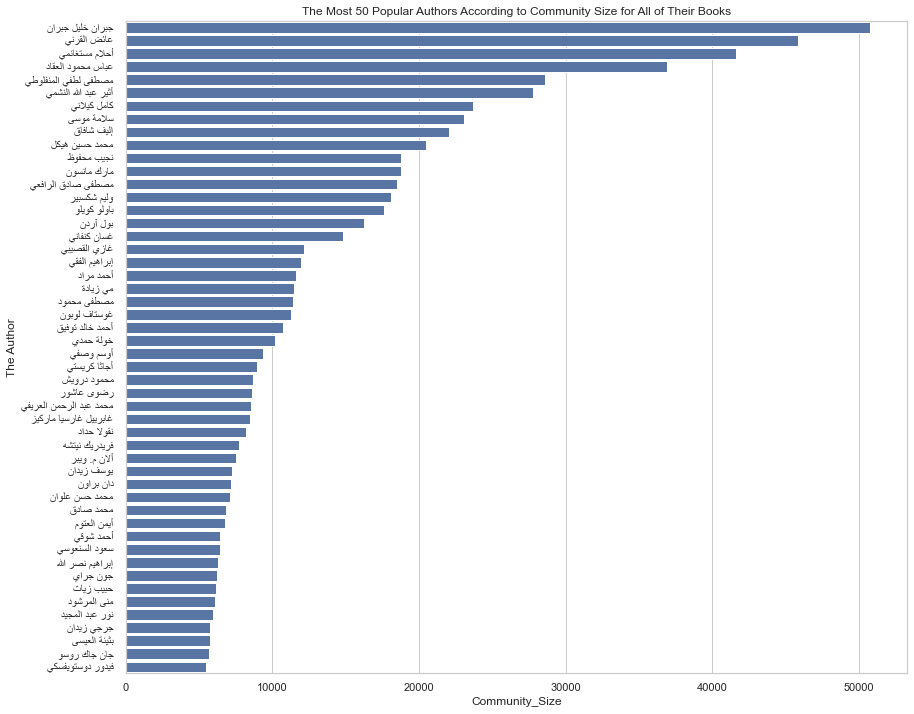

In [13]:
popular_authors = books.groupby('Author').sum().Community_Size.nlargest(50)
#pd.Series(popular_authors.values).apply(f)
#popular_authors.values = popular_authors.values.apply(f)
plt.figure(figsize=(14,12))
plt.title("The Most 50 Popular Authors According to Community Size for All of Their Books")
sns.set(style="whitegrid") #dark, white, ticks
sns.barplot(popular_authors.values, pd.Series(popular_authors.index).apply(f), color = "b")
plt.ylabel("The Author")
plt.xlabel("Community_Size")
#plt.xticks(rotation=90)
plt.savefig('Plots/Popular_Authors.png', dpi=100)
plt.show()

## The books that got the highest 50 number of reviews.

To learn the most popular books. 

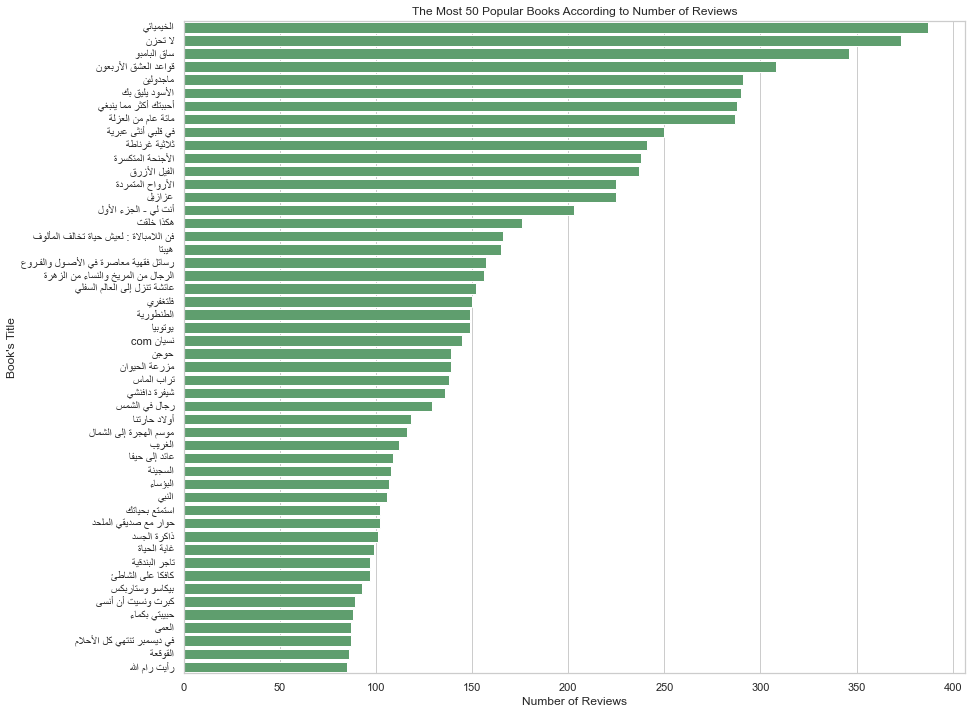

In [14]:
popular_books = books.groupby('Title').sum().Reviews_Number.nlargest(50)
plt.figure(figsize=(14,12))
plt.title("The Most 50 Popular Books According to Number of Reviews")
sns.barplot(popular_books.values, pd.Series(popular_books.index).apply(f), color = "g")
sns.set(style="whitegrid") 
plt.ylabel("Book's Title")
plt.xlabel("Number of Reviews")
#plt.xticks(rotation=90)
plt.savefig('Plots/Popular_Books.png', dpi=100)
plt.show()

## Top 50 years according to the number of the published books.

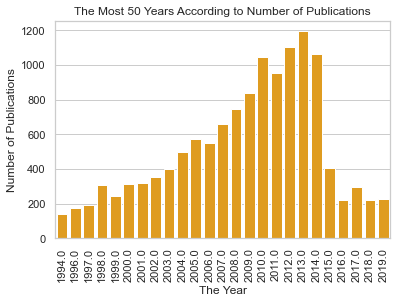

In [15]:
years = books.groupby('Publication_Year').size().nlargest(25)
plt.title("The Most 50 Years According to Number of Publications")
sns.barplot(years.index, years.values, color ="orange")
sns.set(style="ticks")
plt.xlabel("The Year")
plt.ylabel("Number of Publications")
plt.savefig('Plots/Years.png', dpi=100)
plt.xticks(rotation=90)
plt.show()

## Is there any correlation among the data?
From the correlation matrix, we see a strong correlation between:
- Quotes_Number and Reviews_Number,
- Community_Size and Reviews_Number, 
- Community_Size and Quotes_Number. 

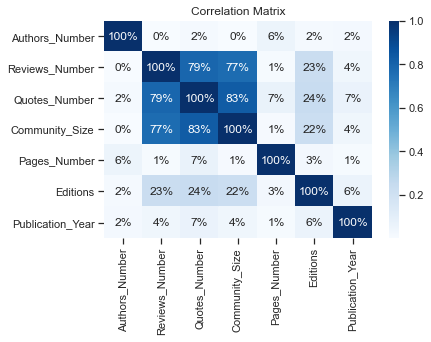

In [16]:
correlated = books[['Authors_Number', 'Reviews_Number', 'Quotes_Number', 'Community_Size', 'Pages_Number', 'Editions', 'Publication_Year']]
plt.title("Correlation Matrix")
sns.heatmap(correlated.corr(),annot=True, fmt='.0%',cmap="Blues")
plt.savefig('Plots/Correlation.png', dpi=100)
plt.show()

## Can we predict the number of ratings given the number of number of pages?
We plot a regression graph to understand the relationship between number of pages and number of reviews. 

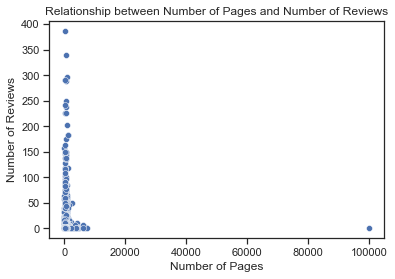

In [17]:
plt.title("Relationship between Number of Pages and Number of Reviews")
sns.scatterplot(x=books['Pages_Number'],y=books['Reviews_Number'])
plt.xlabel("Number of Pages")
plt.ylabel("Number of Reviews")
plt.savefig('Plots/Scatter.png', dpi=100)
plt.show()